# The Discrete Fourier Transform

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import IPython
import scipy as sp
import time
from scipy import signal
from scipy.misc import imread
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

## SoundWave Class

In [2]:
class SoundWave(object):
    """A SoundWave class for working with digital audio signals.
    Attributes:
        rate (int): The sample rate of the sound.
        samples ((n,) ndarray): NumPy array of samples.
    """
    # Problem 1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.
        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        Returns:
            A SoundWave object.
        """
        self.rate=rate
        self.samples=samples
    
    def plot(self):
        """Plot and display the graph of the sound wave."""
        x=np.linspace(0,len(self.samples)/rate,len(self.samples))
        y=self.samples
        plt.plot(x,y,'-r')
        plt.xlabel('Seconds')
        plt.show()
        
    # Problem 2
    def export(self, filename):
        """Generate a wav file called filename from the sample rate and samples. 
        If the array of samples is not of type int16, scale it so that it is."""
        if self.samples.dtype is not np.dtype('int16'):
            self.samples=np.float64(self.samples)
            self.samples*=(32767/max(self.samples))
            self.samples=np.int16(self.samples)
        wavfile.write(filename,self.rate,self.samples)
    
    # Problem 4
    def __add__(self, other):
        """Add two sound waves together into one wave."""
        if len(self.samples)!=len(other.samples):
            raise ValueError("Waves are not the same length")
        return SoundWave(self.rate,np.array(self.samples)+np.array(other.samples))
    
    def append(self, other):
        """Append additional samples to the end of the current samples."""
        if self.rate!=other.rate:
            raise ValueError("Sample rates are not equal!")
        self.samples=np.hstack((self.samples,other.samples))
        
    # Problem 7
    def plot_dft(self):
        """Take the DFT of the sound wave. Scale the x-axis so the x-values correspond
        to the frequencies present in the plot. Display the left half of the plot."""
        dft = abs(sp.fft(self.samples)) # Ignore the complex part.
        N = dft.shape[0]
        x = np.linspace(1, N, N)
        x = x * self.rate / N
        plt.plot(x[:N//2],dft[:N//2])
        plt.show()
        return x,dft

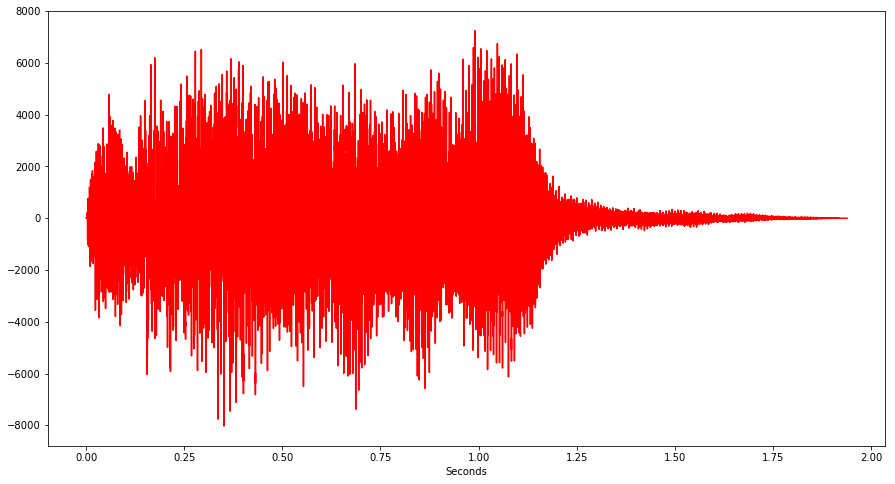

int16


False

In [3]:
#example of reading a .wav file and and initiating a SoundWave object
rate,sample=wavfile.read('tada.wav')
ex=SoundWave(rate,sample)
ex.plot()



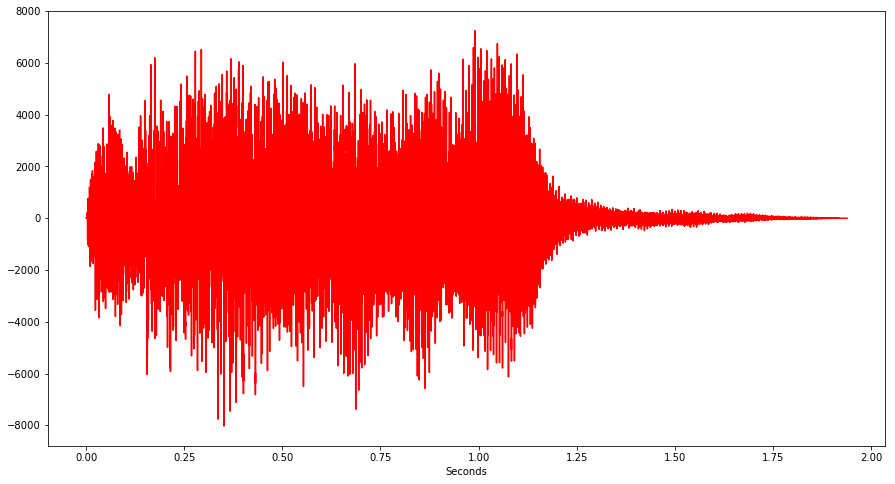

In [5]:
#example of how to use the SoundWave object type to create a new .wav file
ex.export("Bruce's_tada.wav")
rate,sample=wavfile.read("Bruce's_tada.wav")
ex2=SoundWave(rate,sample)
ex2.plot()
ex.export('ex.wav')
IPython.display.Audio('./ex.wav')

In [6]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 samples per second.
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    wave_function = lambda x: 32676*np.sin(2*np.pi*x*frequency)
    sample_points = np.linspace(0, duration, int(44100*duration))
    samples = wave_function(sample_points)
    sound = SoundWave(44100, samples)
    return sound

Write the `add()` magic method of the `SoundWave` class.

Generate a minor chord ('A', 'C', and 'E' notes) and display it.

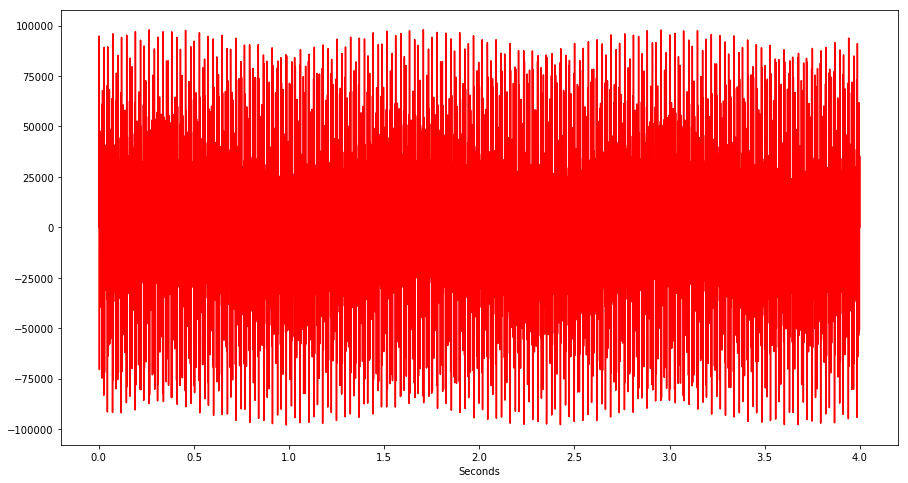

In [10]:
A_note=generate_note(440,2)
C_note=generate_note(523.25,2)
E_note=generate_note(659.25,2)
A_minor=A_note+C_note+E_note
A_minor.plot()
A_minor.export('A_minor.wav')
IPython.display.Audio('./A_minor.wav')

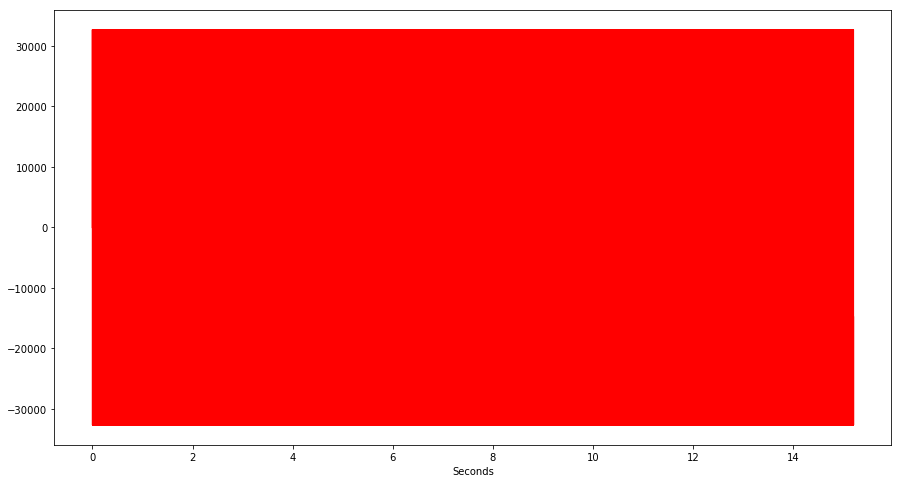

In [18]:
#we show how to use the .append method for the SoundWave class and use it to create a SoundWave object representing a C-scale
C=generate_note(523.25,.2)
D=generate_note(587.33,.1)
E=generate_note(659.25,.1)
F=generate_note(698.46,.1)
G=generate_note(783.99,.1)
A=generate_note(880,.1)
B=generate_note(987.76,.1)
C_hi=generate_note(1046.5,.2)
C_scale=C
C_scale.append(D)
C_scale.append(E)
C_scale.append(F)
C_scale.append(G)
C_scale.append(A)
C_scale.append(B)
C_scale.append(C_hi)
C_scale.append(B)
C_scale.append(A)
C_scale.append(G)
C_scale.append(F)
C_scale.append(E)
C_scale.append(D)
C_scale.append(C)
C_scale.append(E)
C_scale.append(G)
C_scale.append(C_hi)
C_scale.append(G)
C_scale.append(E)
C_scale.append(C)



In [19]:
#save the file
C_scale.export('C_scale.wav')
IPython.display.Audio('./C_scale.wav')

In [113]:
def naive_DFT(samples):
    """Compute the DFT of the array of samples using the naive method (meaninf matrix multiplication).
    Parameters:
        samples ((n,) ndarray): NumPy array of samples.
    Returns:
        dft ((n,) ndarray): The DFT of the given array."""
    dft=[]
    for k in range(len(samples)):
        dft.append(np.sum((np.e**(-2*np.pi*1.j*k/len(samples)))**np.linspace(0,len(samples)-1,len(samples))*samples))
    return np.array(dft)
        

Take the DFT of a small array of samples using your naive function and the SciPy method. Print the results of `np.allclose()` to verify that your function works.

In [114]:
a=np.array([1,2,3,4,5,6,7,6,5,4,3,2,1,8,8,8,8,9,0,12,33,2,1,2,3,4,5,6,7,])
b=np.array([1,2])
naive_DFT(b)
dft_ex=sp.fft(a)
a_mine=naive_DFT(a)
np.allclose(dft_ex,a_mine)

True

In [117]:
def FFT(samples):
    """Compute the DFT using the FFT algorithm.
    Parameters:
        samples ((n,) ndarray): NumPy array of samples.
    Returns:
        dft ((n,) ndarray): The DFT of the given array."""
    N=len(samples)
    if N==1:
        return naive_DFT(samples)
    else:
        even=FFT(samples[::2])
        odd=FFT(samples[1::2])
        k=np.arange(N)
        factors=(np.e**(-2*np.pi*1.j*k/N))
        return np.concatenate((even+factors[:N//2]*odd,even+factors[N//2:]*odd))

Generate a small array of random samples (size must be a power of 2) and take its DFT using the FFT function you wrote and the SciPy method. Print the results of `np.allclose()` to verify that your function works.

In [120]:
samples=np.array([1,2])
samples2=np.random.random((1024,))
dft_ex=sp.fft(samples)
dft_mine=FFT(samples)
dft_ex2=sp.fft(samples2)
dft_mine2=FFT(samples2)
print(np.allclose(dft_ex,dft_mine))
print(np.allclose(dft_ex2,dft_mine2))

True
True


Now, compare the runtimes of your `naive_DFT()`, your `FFT()` function, and the SciPy method on the same random sample. Print the results.

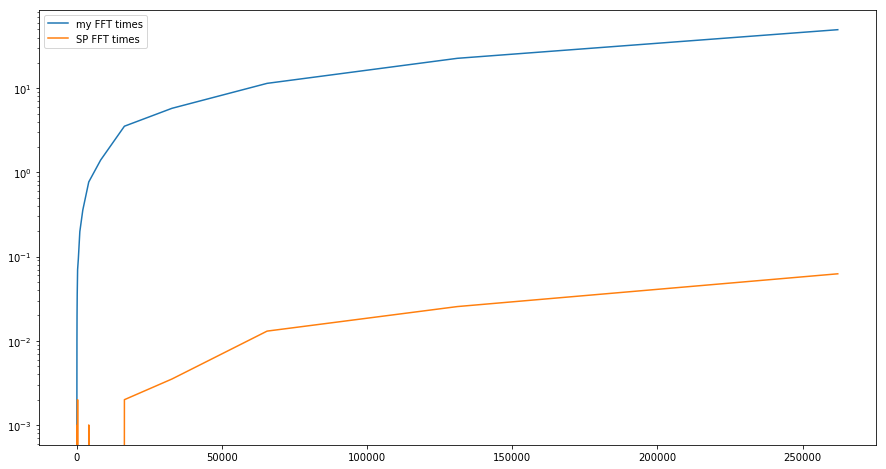

In [131]:
random=[]
x=[]
for i in range(1,19):
    x.append(2**i)
    random.append(np.random.random((2**i)))
time_mine=[]
time_sp=[]
for i in random:
    start=time.time()
    FFT(i)
    time_mine.append(time.time()-start)
    start=time.time()
    sp.fft(i)
    time_sp.append(time.time()-start)
plt.plot(x,time_mine,label='my FFT times')
plt.plot(x,time_sp,label='SP FFT times')
plt.legend()
plt.yscale('log')
plt.show()
    
#We can see graphically that the FFt is very fast, but scipy optimizes the fft to be even faster

Write the `plot_dft()` method in the `SoundWave` class.

Display the plot of the DFT of the 'A' note.

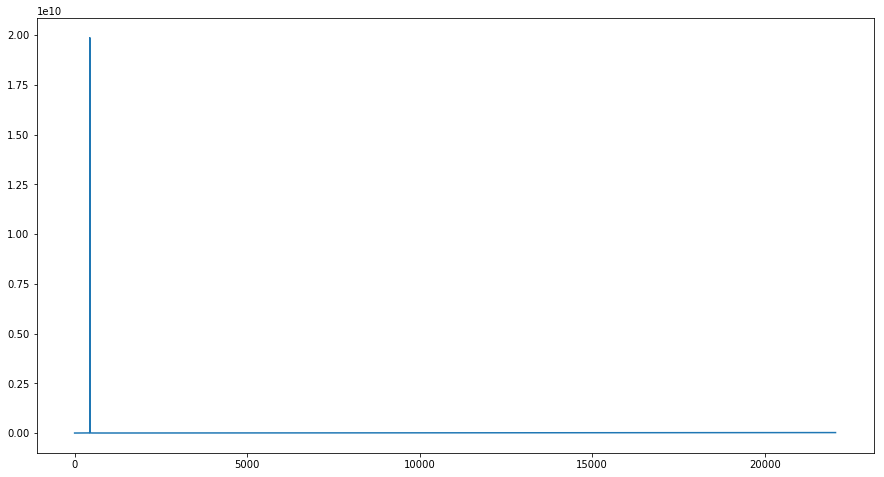

array([  0.00000000e+00,   6.61132501e-04,   5.28871176e-03, ...,
         5.24744181e+02,   2.33226895e+02,   5.83112253e+01])

In [30]:
A_note=generate_note(440,2)
A_note.plot_dft()

Display the plot of the DFT of the minor chord.

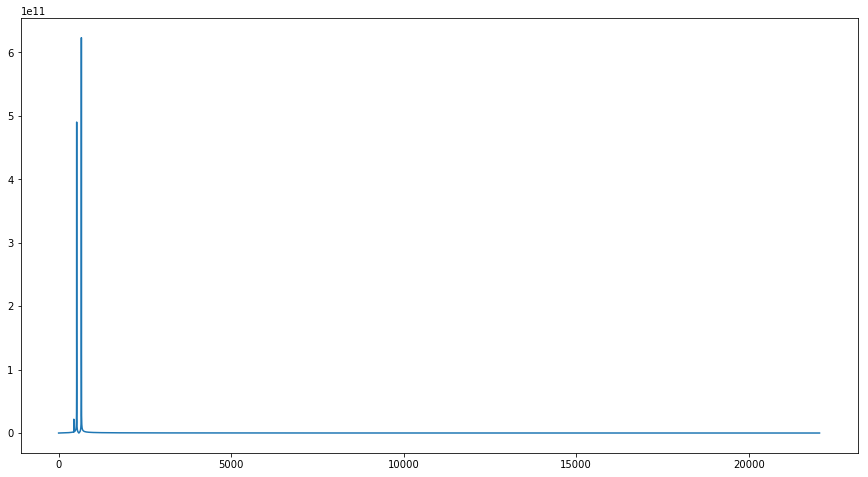

array([  0.00000000e+00,   7.85726240e+05,   1.57145608e+06, ...,
         6.92991205e+10,   6.92996416e+10,   6.93002686e+10])

In [31]:
C_note=generate_note(523.25,2)
E_note=generate_note(659.25,2)
A_chord=A_note+C_note+E_note
A_chord.plot_dft()

Use the information you have learned about the DFT to determine the notes present in the `mystery_sound.wav` file.

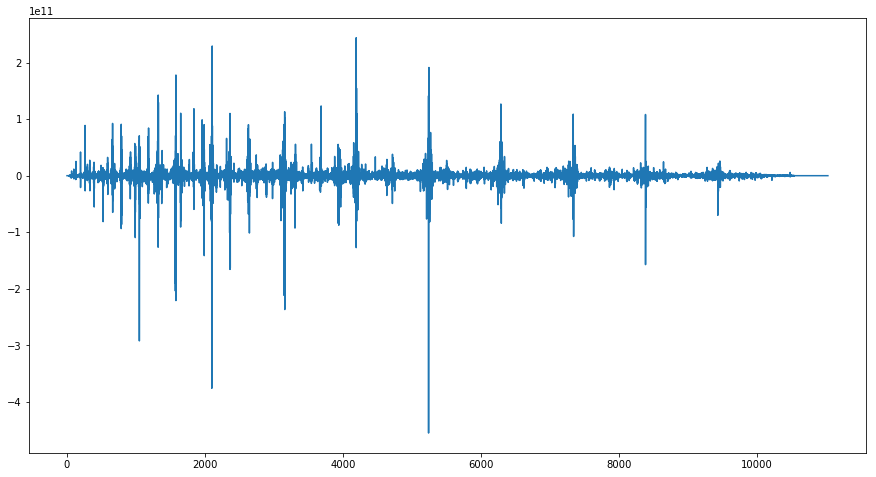

Note C  3th octave
Note C  3th octave
Note C  4th octave


In [80]:
DFT_gr=ex.plot_dft()
two_powers=[1,2,4,8,16,32,64]
for i in range(0,10000,40):
    spike=np.argmax(DFT_gr[i:i+39])+i
    if spike%440<6 and int((spike-spike%440)/440) in two_powers:
        print('Note A ', str(int(np.log2((spike-spike%440)/440))+1)+ 'th octave')
    elif spike%493.88<6 and int((spike-spike%493.88)/493.88) in two_powers:
        print('Note B ', str(int(np.log2((spike-spike%493.88)/493.88))+1)+ 'th octave')
    elif spike%523.25<6 and int((spike-spike%523.25)/523.25) in two_powers:
        print('Note C ', str(int(np.log2((spike-spike%523.25)/523.25))+1)+ 'th octave')
    elif spike%587.33<6 and int((spike-spike%587.33)/587.33) in two_powers:
        print('Note D ', str(int(np.log2((spike-spike%587.33)/587.33))+1)+ 'th octave')
    elif spike%659.25<6 and int((spike-spike%659.25)/659.25) in two_powers:
        print('Note C ', str(int(np.log2((spike-spike%659.25)/659.25))+1)+ 'th octave')
    elif spike%698.46<6 and int((spike-spike%698.46)/698.46) in two_powers:
        print('Note C ', str(int(np.log2((spike-spike%698.46)/698.46))+1)+ 'th octave')
    elif spike%783.99<6 and int((spike-spike%783.99)/783.99) in two_powers:
        print('Note C ', str(int(np.log2((spike-spike%783.99)/783.99))+1)+'th octave')

What are the notes present in the mystery sound?

    Note the DFT and FFT algorithms used in problem 5 and 6 were inspired by algorithms found at https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/.

# Filtering and Convolution

In [7]:
# Audio of tada.wav.
IPython.display.Audio("tada.wav")

Create a `SoundWave` object that is the circular convolution of `tada.wav` and two seconds of white noise. 

In [21]:
sample_rate=22050
rate,sample=wavfile.read('tada.wav')
ex=SoundWave(rate,sample)
noise=np.random.randint(-32767,32767,sample_rate*2)
pad=np.zeros(len(noise)-len(ex.samples))
ex.samples=np.hstack((ex.samples,pad))
ex.samples=np.real(sp.ifft(sp.fft(ex.samples)*sp.fft(noise)))
ex.export('Convoluted_tada.wav')
IPython.display.Audio('Convoluted_tada.wav')

Use the `append()` method in the `SoundWave` class to loop multiple copies of the signal consecutively. 

In [22]:
ex.append(ex)
ex.append(ex)
ex.append(ex)
ex.export('Convoluted_tada_extended.wav')
IPython.display.Audio('Convoluted_tada_extended.wav')

In [23]:
# Audio of the AEA.wav
IPython.display.Audio('AEA.wav')

In [24]:
# Audio of EAE.wav
IPython.display.Audio('EAE.wav')

Write a function called `convolve_fft()` below that calculates the linear convolution using the FFT and IFFT. 

In [25]:
# Naive algorithm for a linear convolution. 
def naive_convolve(sample1,sample2):
    """Calculate the linear conovolution of sample1 and sample2 using the definition of convolution.

    Parameters:
        sample1 ((n,) ndarray): an array of length n representing the first sound sample. 
        sample2 ((m,) ndarray): an array of length m representing the second sound sample. 
    
    Return:
        ((n+m-1,) ndarray): an array of length n+m-1 representing the convolution of the two samples. 
    """
    sig1 = np.append(sample1, np.zeros(len(sample2)-1))
    sig2 = np.append(sample2, np.zeros(len(sample1)-1))

    final = np.zeros_like(sig1)
    rsig1 = sig1[::-1]
    for k in range(len(sig1)):
        final[k] = np.sum((np.append(rsig1[(k-1):],rsig1[:(k-1)]))*sig2)
    return final

# Linear Convolution using the Fourier Transforms
def convolve_fft(sample1,sample2):
    """Calculate the linear conovolution of sample1 and sample2 using the Convolution Theorem.

    Parameters:
        sample1 ((n,) ndarray): an array of length n representing the first sound samples. 
        sample2 ((m,) ndarray): an array of length m representing the second sound samples. 
    
    Return:
        ((n+m-1,) ndarray): an array of length n+m-1 representing the convolution of the two samples. 
    """
    sig1 = np.append(sample1, np.zeros(len(sample2)-1))
    sig2 = np.append(sample2, np.zeros(len(sample1)-1))
    return np.real(sp.ifft(sp.fft(sig1)*sp.fft(sig2)))
    

In [26]:
#we do some convolutions and report the time it takes for various methods
rate,sample=wavfile.read('AEA.wav')
AEA=SoundWave(rate,sample)
rate,sample=wavfile.read('EAE.wav')
EAE=SoundWave(rate,sample)
time_naive=0
time_mine=0
time_sp=0
start=time.time()
naive_convolve(AEA.samples,EAE.samples)
time_naive=time.time()-start
start=time.time()
convolve_fft(AEA.samples,EAE.samples)
time_mine=time.time()-start
start=time.time()
sp.signal.fftconvolve(AEA.samples,EAE.samples)
time_sp=time.time()-start
print('Time for naive method:',time_naive,'\nTime for my method:',time_mine,'\nTime for SP method:',time_sp)
#my FFT is more than 200 time faster, and using scipies optimal solution it is more than 1000 time faster!

Time for naive method: 28.37842607498169 
Time for my method: 0.12020587921142578 
Time for SP method: 0.020165205001831055


In [29]:
# Listen to the audio created by the convolve_fft() function.  
AEAEAE_conv=SoundWave(rate,convolve_fft(AEA.samples,EAE.samples))
AEAEAE_conv.export('AEAEA_conv.wav')
IPython.display.Audio('AEAEA_conv.wav')

In [30]:
# Listen to the audio created by the sp.signal.fftconvolve() function. 
AEAEAE_conv_sp=SoundWave(rate,sp.signal.fftconvolve(AEA.samples,EAE.samples))
AEAEAE_conv.export('AEAEA_conv.wav')
IPython.display.Audio('AEAEA_conv.wav')

In [31]:
# Audio of chopin.wav. 
IPython.display.Audio("chopin.wav")

In [32]:
# Audio of balloon.wav. 
IPython.display.Audio("balloon.wav")

Use the `signal.fftconvolve()` to convolve the signals of `balloon.wav` and `chopin.wav`.

In [36]:
rate,sampleb=wavfile.read('balloon.wav')
rate,samplec=wavfile.read('chopin.wav')
chop_conv=SoundWave(rate,sp.signal.fftconvolve(sampleb,samplec))
chop_conv.export('chop_con.wav')
IPython.display.Audio('chop_con.wav')

Write a function that removes a range of frequencies in a signal.

In [94]:
def clean_signal(samples, rate, low_freq, high_freq):
    """Remove a range of frequencies from a sound sample using the Fourier Transform. 
    
    Parameters:
        samples ((n,) ndarray): Array of sound samples of length n. 
        rate (int): Sampling rate (the number of samples per second). 
        low_freq (float): Lower bound of the frequency range. 
        high_freq (float): Higher boound of the frequency range. 
    Returns:
        ((n,) ndarray): Array of the samples with the frequencies removed. 
    """
    low=low_freq*len(samples)//rate
    hi=high_freq*len(samples)//rate
    fft_sig=sp.fft(samples)
    fft_sig[low:hi]=0
    fft_sig[-hi:-low]=0
    return np.real(sp.ifft(fft_sig))

In [38]:
# Audio of Noisysignal2.wav.
IPython.display.Audio("Noisysignal2.wav")

Plot the DFT of the Noisysignal2.wav to determine the frequencies with high amplitudes.

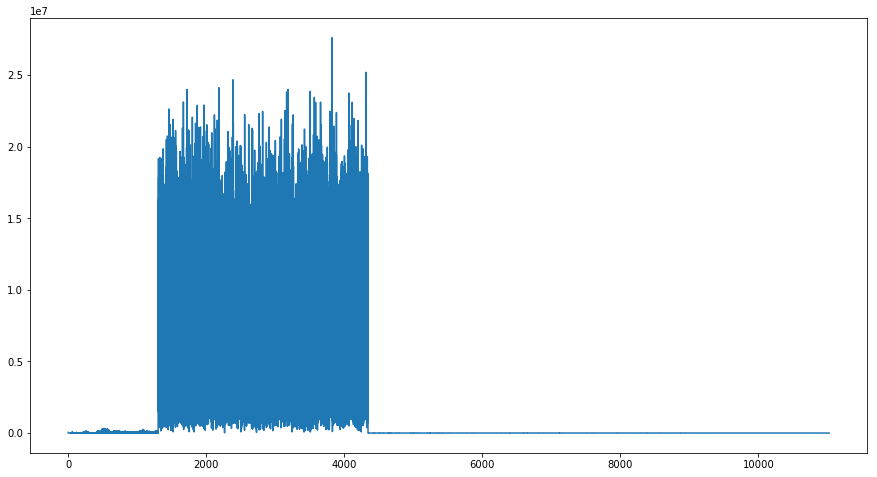

In [99]:
rate,sample=wavfile.read('Noisysignal2.wav')
noisy_wave=SoundWave(rate,sample)
x,y=noisy_wave.plot_dft()
index=0
#we can see graphically that Noisy signal has avery dominant frequency that masks the underlying audio

Clean the signal by using the function you have written and make this signal a `SoundWave` object.

Listen to the signal to see if the noise has been filtered out.  

1280 4365


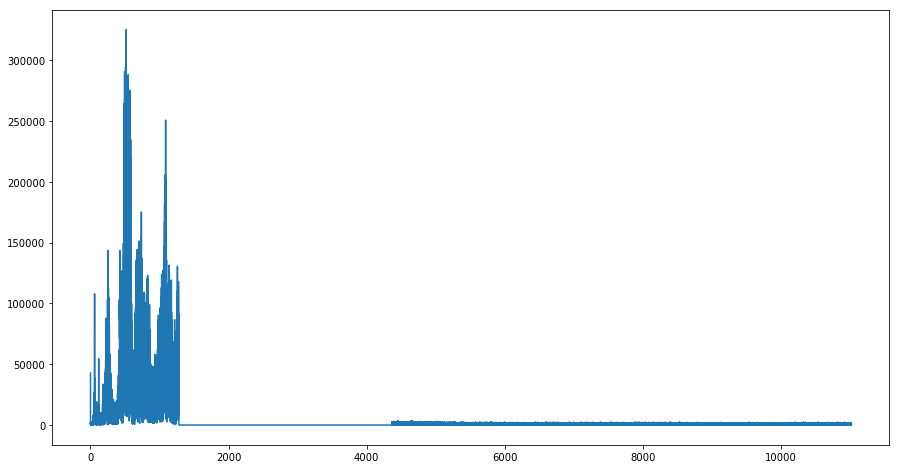

In [109]:
low=0
high=0
for i in range(len(x)//2):
    if y[i+1]-y[i]>1.3e7 and low==0:
        low=int(x[i]-25)
    elif y[i]-y[i+1]>1.3e7 and y[i]-y[i+5]<1.3e7 and y[i]-y[i+10]<1.3e7:
        high=int(x[i]+25)
print(low,high)
clean_sample=clean_signal(sample,rate,low,high)
cleaned_noise_wave=SoundWave(rate,clean_sample)
cleaned_noise_wave.plot_dft()
cleaned_noise_wave.export('cleaned_noisy2.wav')
IPython.display.Audio("cleaned_noisy2.wav")

In [ ]:
# You may use this box to plot the new signal in the frequency domain. 
# This can help you fine-tune the high and low frequencies to filter out. 

In [ ]:
# Original sound clip: vuvuzela.wav
IPython.display.Audio("vuvuzela.wav")

In [ ]:
# Display the fft of the image

In [ ]:
# Clean up the fft and display it

In [ ]:
# Display the newly deblurred image